In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras import models, layers

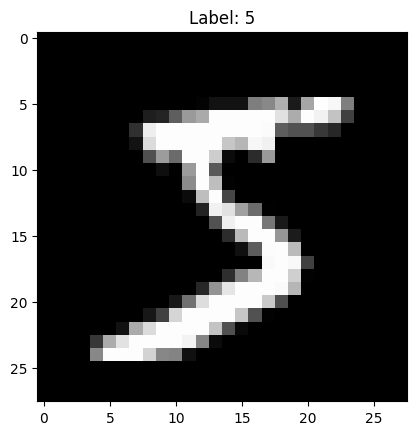

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [3]:
train_images = train_images.reshape((60000,28,28,1)).astype("float32")/255
test_images = test_images.reshape((10000,28,28,1)).astype("float32")/255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


750/750 [==============================] - 11s 14ms/step - loss: 0.2217 - accuracy: 0.9306 - val_loss: 0.0657 - val_accuracy: 0.9806
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.0571 - val_accuracy: 0.9841
Epoch 3/5
750/750 [==============================] - 10s 14ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0504 - val_accuracy: 0.9847
Epoch 4/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0419 - val_accuracy: 0.9886
Epoch 5/5
750/750 [==============================] - 9s 13ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.0386 - val_accuracy: 0.9883


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0299 - accuracy: 0.9895
Test Accuracy: 0.9894999861717224


1/1 [==============================] - 0s 41ms/step


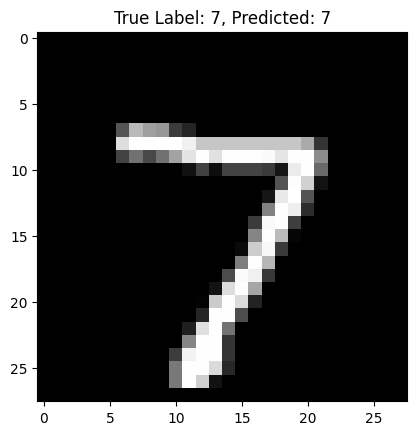

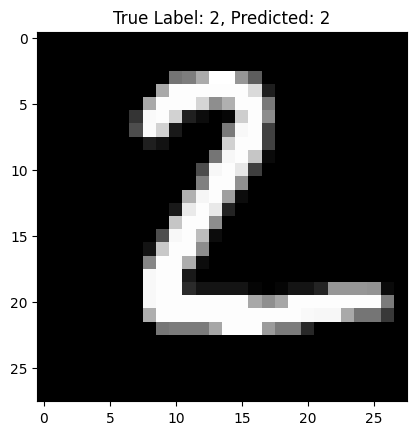

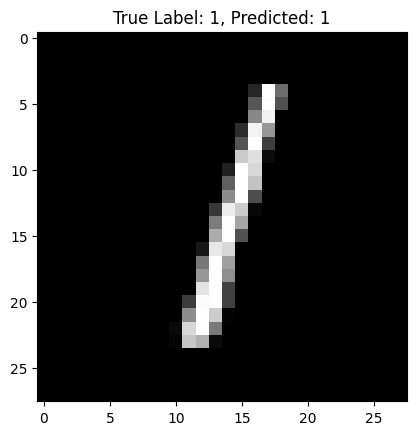

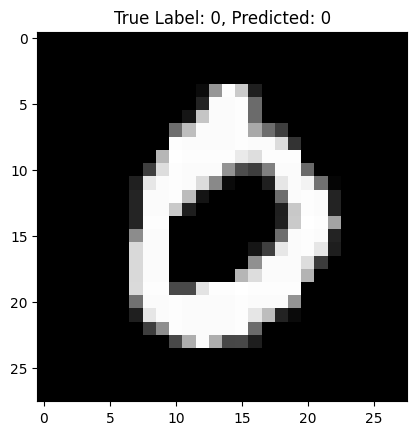

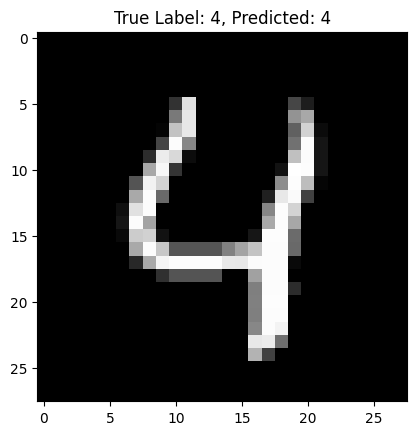

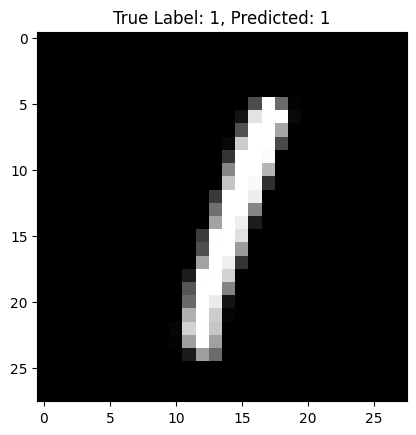

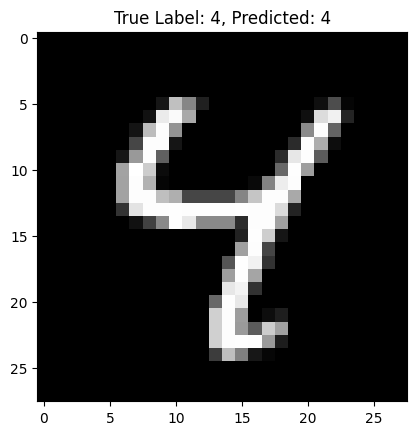

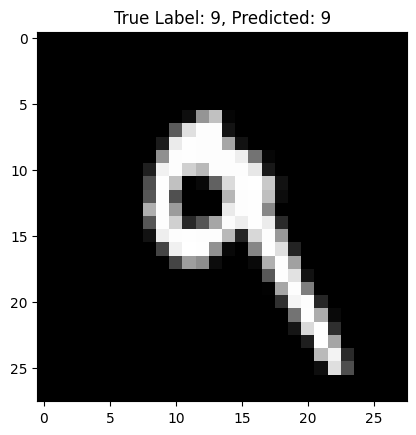

In [8]:
predictions = model.predict(test_images[:8])
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]
for i in range(8):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {tf.argmax(test_labels[i]).numpy()}, Predicted: {predicted_labels[i]}")
    plt.show()